<h1 style="text-align:center; color:gold">HMS Yield vs Run Number</h1>

In [47]:
import sys, uproot, warnings
warnings.filterwarnings('ignore')
from time import time
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2')
from common_functions import E as R
from common_functions import shaxes
from common_functions import cafe_report_path, tinfo_path
from common_functions import rangi_sari as colors

<h1 style="text-align:center; color:pink">SHMS Yield vs Run Number</h1>

In [ ]:
pro2l = []
runlist_path = '/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/runlists/eruns_all_ld2.dat'
datafile_path = '/Volumes/smriti/xem2/ROOTfiles/'
print(cafe_report_path)
rl = np.loadtxt(runlist_path, dtype = int, usecols = 0)
mcl = np.loadtxt(runlist_path, usecols = 1)
rh4 = np.loadtxt('/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/runlists/eruns_all_He4.dat', dtype = int, usecols = 0)
mh4 = np.loadtxt('/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/runlists/eruns_all_He4.dat', usecols = 1)
rh3 = np.loadtxt('/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/runlists/eruns_all_He3.dat', dtype = int, usecols = 0)
mh3 = np.loadtxt('/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/runlists/eruns_all_He3.dat', usecols = 1)
rh2 = np.loadtxt('/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/runlists/eruns_all_LH2.dat', dtype = int, usecols = 0)
mh2 = np.loadtxt('/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/runlists/eruns_all_LH2.dat', usecols = 1)

def read_current(rl):
    ccl, c2l = [], []
    for run in rl:
        cafe_report = open(cafe_report_path + "replay_hms_production_%d_-1.report"%run)
        for line in cafe_report:
            if "BCM4A Beam Cut Current" in line:
                cc = float((line.split(":")[1]).strip()[:-2])
                ccl.append(cc)
            if "BCM4A Beam Cut Charge" in line:
                c2 = float((line.split(":")[1]).strip()[:-2])
                c2l.append(c2)
    totcharge = np.sum(c2l)
    weightedcc = (np.array(c2l) * np.array(ccl)) / totcharge
    return ccl, c2l
    # return weightedcc

ccl, ud2 = read_current(rl)
ch2, uh2 = read_current(rh2)
ch3, uh3 = read_current(rh3)
ch4, uh4 = read_current(rh4)

/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/reportfiles/


nan nan


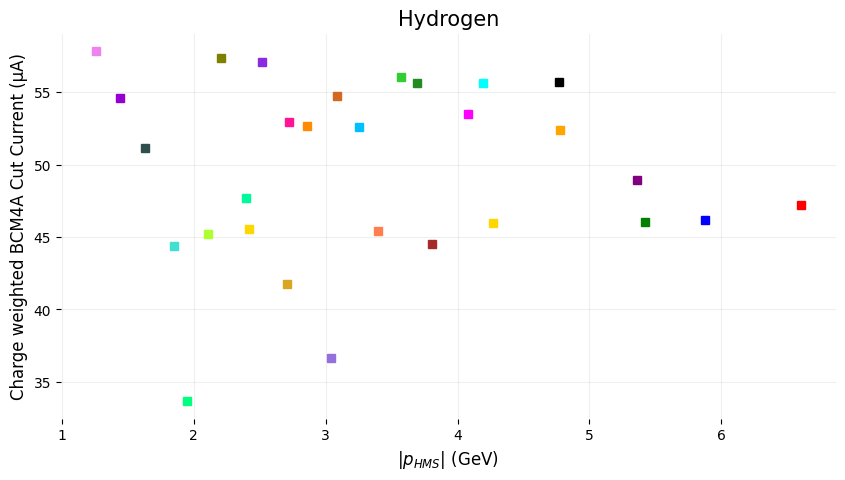

In [83]:
unique = []
def avg_I(mh, ch, uh):
    # Compute average current for each unique momentum setting
    unique_momenta = np.unique(mh)
    avg_currents = {}
    for umom in unique_momenta:
        # print(umom)
        indices = np.where(mh == umom)[0] # returns indices where the condition is True
        relevant_charges = np.array([uh[i] for i in indices])
        totcharge = np.sum(relevant_charges)
        relevant_currents = np.array([ch[i] for i in indices])
        wrcurr = np.sum(relevant_currents * relevant_charges) / totcharge
        avg_currents[umom] = {
            'avg': np.mean(relevant_currents),
            'weighted': wrcurr,
            'values': relevant_currents
        }
    unique.append(unique_momenta)
    return avg_currents

avg_ld2 = avg_I(mcl, ccl, ud2)
avg_lh2 = avg_I(mh2, ch2, uh2)
avg_he3 = avg_I(mh3, ch3, uh3)
avg_he4 = avg_I(mh4, ch4, uh4)

momld2 = np.abs(np.array(list(avg_ld2.keys())))
currld2 = [v['weighted'] for v in avg_ld2.values()]
momlh2 = np.abs(np.array(list(avg_lh2.keys())))
currlh2 = [v['weighted'] for v in avg_lh2.values()]
momhe3 = np.abs(np.array(list(avg_he3.keys())))
currhe3 = [v['weighted'] for v in avg_he3.values()]
momhe4 = np.abs(np.array(list(avg_he4.keys())))
currhe4 = [v['weighted'] for v in avg_he4.values()]

rdl, twd = [], []
# fig, ax = shaxes(xlabel = r'$|p_{HMS}|$ (GeV)', ylabel = 'Average BCM4A Cut Current (μA)', allgone = True)
fig, ax = shaxes(xlabel = r'$|p_{HMS}|$ (GeV)', ylabel = 'Charge weighted BCM4A Cut Current (μA)', allgone = True, title = 'Hydrogen')
# for i, (x, y) in enumerate(zip(momld2, currld2)):
#     if y < 35:
#         ax.plot(x, y, marker = 's', linestyle = '', color = colors[i])
#         rdl.append(y)
#     else:
#         ax.plot(x, y, marker = 'o', linestyle = '', color = colors[i])
#         twd.append(y)
for i, (x, y) in enumerate(zip(momlh2, currlh2)):
    ax.plot(x, y, marker = 's', linestyle = '', color = colors[i])
rda = np.mean(rdl)
tda = np.mean(twd)
# ax.axhline(y = rda, linestyle = '--', color = 'black', label = 'Average Current for 20° data')
# ax.axhline(y = tda, linestyle = '--', color = 'red', label = 'Average Current for 26° & 35°')
# ax.plot(np.abs(list(avg_ld2.keys())), [v['weighted'] for v in avg_ld2.values()], marker = 's', color = 'blue', linewidth = 0, label = 'LD2')
# ax.axhline(y = np.mean(ccl), color = 'blue', linestyle = '--', label = 'Average current for LD2')
# ax.plot(np.abs(list(avg_lh2.keys())), [v['weighted'] for v in avg_lh2.values()], marker = '*', color = 'red', linewidth = 0, label = 'LH2')
# ax.axhline(y = np.mean(ch2), color = 'red', linestyle = '--', label = 'Average current for LH2')
# ax.legend()
plt.savefig(f'plots/settcurr{time():.0f}.png', dpi = 300, bbox_inches = 'tight')
print(rda, tda)

In [94]:
def sysboil():
    uncer = avg_lh2.copy()
    m = 10.98
    Δm = 0.39
    cdensplus = ((m + Δm) * np.array(currlh2)) / 10000
    ytrueplus = 1 / (1 - cdensplus)
    cdensnega = ((m - Δm) * np.array(currlh2)) / 10000
    ytruenega = 1 / (1 - cdensnega)
    ΔY = ytrueplus - ytruenega
    for i, key in enumerate(uncer.keys()):
        uncer[key]['sysunc'] = ΔY[i]
    return uncer

def boil(Iavg):
    m = 24.0
    Δm = 0.95
    cdensplus = ((m + Δm) * Iavg) / 10000
    print(f'cdensplus {cdensplus}')
    ytrueplus = 1 / (1 - cdensplus)
    print(f'ytrueplus {ytrueplus}')
    cdensnega = ((m - Δm) * Iavg) / 10000
    print(f'cdensnega {cdensnega}')
    ytruenega = 1 / (1 - cdensnega)
    print(f'ytruenega {ytruenega}')
    ΔY = ytrueplus - ytruenega
    return ΔY * 100

boil(35.45686206896551)

# for k, v in lh2_uncer.items():
#     print(f"Central momentum = {k}, Systematic Uncertainty = {v['sysunc']*100:.3f}%")

cdensplus 0.08846487086206895
ytrueplus 1.0970504240969112
cdensnega 0.08172806706896552
ytruenega 1.0890020310302826


0.8048393066628634

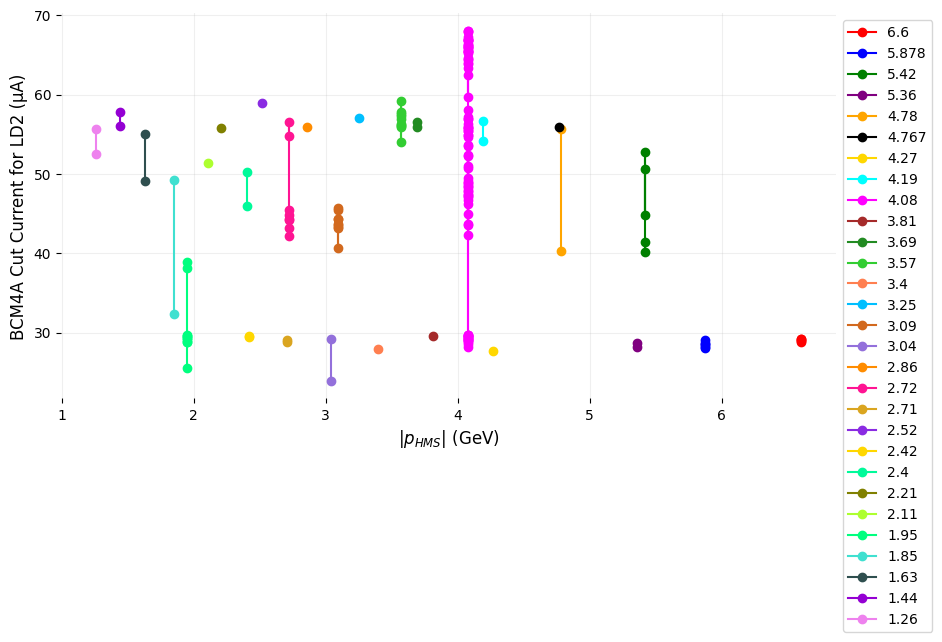

In [51]:
fig, ax = shaxes(xlabel = r'$|p_{HMS}|$ (GeV)', ylabel = 'BCM4A Cut Current for LD2 (μA)', allgone = True)
i = 0
for p, entry in avg_ld2.items():
    currents = entry['values']
    xvals = [abs(p)] * len(currents)  # repeat same momentum for each current
    ax.plot(xvals, currents, marker = 'o', color = colors[i], label = f'{xvals[0]}')
    i += 1
    #     i = 2
    # elif i == 2:
    #     ax.plot(xvals, currents, marker='o', linestyle='', color='red')
    #     i = 3
    # else:
    #     ax.plot(xvals, currents, marker='o', linestyle='', color='green')
    #     i = 1

ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('plots/settingcurrentcolorld2.png', dpi = 300, bbox_inches = 'tight')

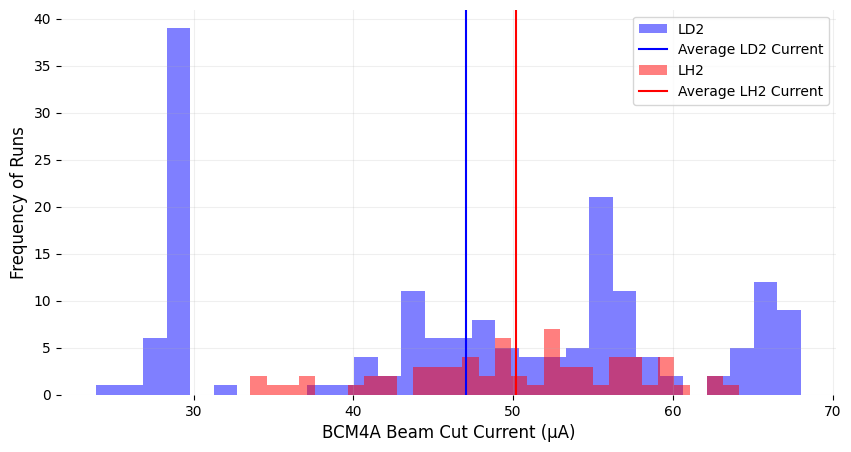

In [87]:
fig, ax = shaxes(xlabel = 'BCM4A Beam Cut Current (μA)', allgone = True, ylabel = 'Frequency of Runs')
ax.hist(ccl, bins = 30, histtype = 'stepfilled', alpha = 0.5, label = 'LD2', color = 'blue')
ax.axvline(x = np.mean(ccl), color = 'blue', label = 'Average LD2 Current')
ax.hist(ch2, bins = 30, histtype = 'stepfilled', alpha = 0.5, label = 'LH2', color = 'red')
ax.axvline(x = np.mean(ch2), color = 'red', label = 'Average LH2 Current')
ax.legend()
plt.savefig('plots/currenthist.png', dpi = 300)

33.95157333333333 35.45686206896551


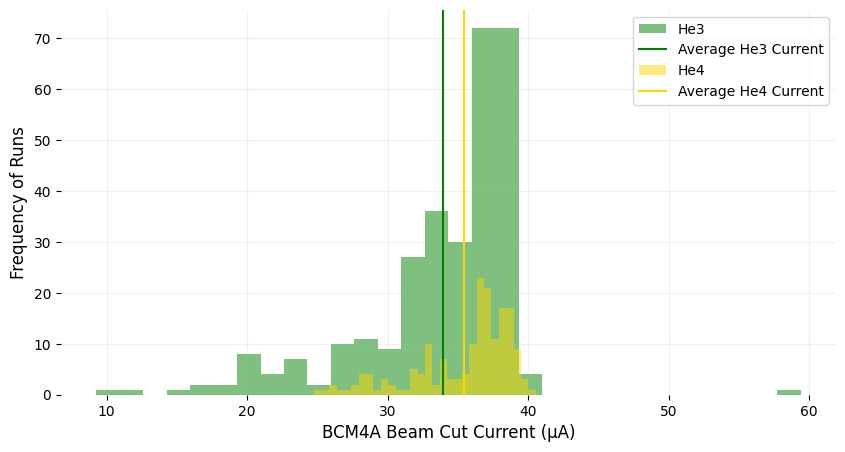

In [90]:
fig, ax = shaxes(xlabel = 'BCM4A Beam Cut Current (μA)', allgone = True, ylabel = 'Frequency of Runs')
bins = 30
ax.hist(ch3, bins = bins, histtype = 'stepfilled', alpha = 0.5, label = 'He3', color = 'green')
ax.axvline(x = np.mean(ch3), color = 'green', label = 'Average He3 Current')
ax.hist(ch4, bins = bins, histtype = 'stepfilled', alpha = 0.5, label = 'He4', color = 'gold')
ax.axvline(x = np.mean(ch4), color = 'gold', label = 'Average He4 Current')
ax.legend()
print(np.mean(ch3), np.mean(ch4))
# plt.savefig('plots/currenthist34.png', dpi = 300)